In [30]:
### Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [20]:
x.shape

(1599, 11)

In [15]:
###Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[ 1.41838781, -0.32925509,  0.81733691, ..., -0.90034808,
         0.57260597,  0.36996154],
       [-0.13713469,  1.57906477, -1.39354657, ...,  0.3314596 ,
        -0.72822233, -0.75660071],
       [ 0.43898476, -1.31067673,  0.30317796, ..., -0.31686023,
         1.02506798,  1.21488322],
       ...,
       [-0.59803024, -0.90175105,  1.12583228, ...,  0.3314596 ,
         0.68572147,  0.55772191],
       [ 4.18376113,  0.84299854,  2.51406145, ..., -2.3266517 ,
         0.12014395,  0.74548229],
       [-0.42519441, -0.54734879,  0.09751438, ...,  0.59078753,
        -0.10608706, -0.85048089]])

In [16]:
#### ANN Libraries

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,ReLU,PReLU,ELU
from keras.layers import Dropout

In [18]:
seq = Sequential()


In [21]:
seq.add(Dense(units = 6 , kernel_initializer = "random_normal", activation="relu",input_dim = 11))

In [22]:
### Adding Hidden Layer
seq.add(Dense(units = 6,kernel_initializer = 'random_normal',activation = 'relu'))

In [24]:
###Output Layer
seq.add(Dense(units=1,kernel_initializer = 'glorot_uniform',activation='relu'))

In [27]:
### Compiler
seq.compile(optimizer="Adamax",loss="mean_squared_error",metrics = ["mean_absolute_error"])

In [28]:
###Fitting ANN to the training Split
model_history = seq.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
81/81 [==============================] - 6s 4ms/step - loss: 29.5575 - mean_absolute_error: 5.3724 - val_loss: 21.1551 - val_mean_absolute_error: 4.4872
Epoch 2/100
81/81 [==============================] - 0s 1ms/step - loss: 16.0211 - mean_absolute_error: 3.8108 - val_loss: 6.5241 - val_mean_absolute_error: 2.2206
Epoch 3/100
81/81 [==============================] - 0s 924us/step - loss: 4.9449 - mean_absolute_error: 1.8789 - val_loss: 4.9226 - val_mean_absolute_error: 1.8866
Epoch 4/100
81/81 [==============================] - 0s 1ms/step - loss: 4.3387 - mean_absolute_error: 1.7244 - val_loss: 4.2700 - val_mean_absolute_error: 1.7426
Epoch 5/100
81/81 [==============================] - 0s 1ms/step - loss: 3.6129 - mean_absolute_error: 1.5618 - val_loss: 3.7249 - val_mean_absolute_error: 1.6230
Epoch 6/100
81/81 [==============================] - 0s 1ms/step - loss: 3.0457 - mean_absolute_error: 1.4131 - val_loss: 3.2057 - val_mean_absolute_error: 1.4988
Epoch 7/100
81/81

Epoch 51/100
81/81 [==============================] - 0s 1ms/step - loss: 0.5344 - mean_absolute_error: 0.5604 - val_loss: 0.5235 - val_mean_absolute_error: 0.5730
Epoch 52/100
81/81 [==============================] - 0s 1ms/step - loss: 0.5168 - mean_absolute_error: 0.5576 - val_loss: 0.5241 - val_mean_absolute_error: 0.5770
Epoch 53/100
81/81 [==============================] - 0s 1ms/step - loss: 0.4710 - mean_absolute_error: 0.5324 - val_loss: 0.5401 - val_mean_absolute_error: 0.5752
Epoch 54/100
81/81 [==============================] - 0s 1ms/step - loss: 0.5373 - mean_absolute_error: 0.5606 - val_loss: 0.5215 - val_mean_absolute_error: 0.5803
Epoch 55/100
81/81 [==============================] - 0s 1ms/step - loss: 0.5160 - mean_absolute_error: 0.5574 - val_loss: 0.5174 - val_mean_absolute_error: 0.5735
Epoch 56/100
81/81 [==============================] - 0s 1ms/step - loss: 0.4888 - mean_absolute_error: 0.5443 - val_loss: 0.5166 - val_mean_absolute_error: 0.5744
Epoch 57/100
81/

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


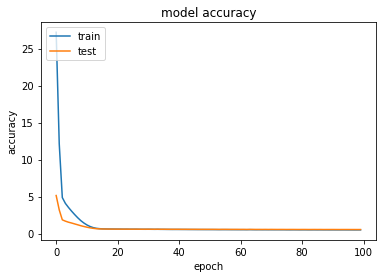

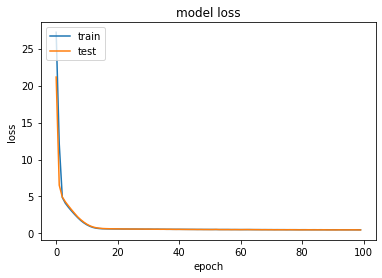

In [32]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
y_pred = seq.predict(x_test)